Mutación aleatoria
===

* 30:00 min | Última modificación: Mayo 19, 2021 | [YouTube]

## Definición del problema

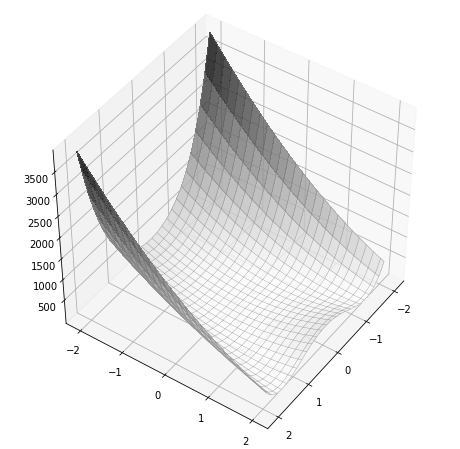

In [1]:
#
# Para ejemplificar su uso, buscará el punto de mínima de
#  la función de Rosenbrock de dos dimensiones. El punto de
#  mínima es f(1, 1) = 0. La región de búsqueda es
#
#    -2.048 < x, y < 2.048
#
# A continuación se gráfica la función y su contorno para
#  el caso de 2 dimensiones.
#
from EOS.benchmarks import Rosenbrock

fn = Rosenbrock(n_dim=2)
fn.plot_surface()

## Mutación aleatoria en un eje aleatorio

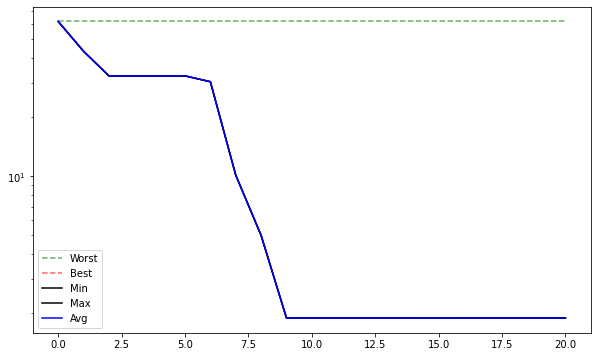

In [2]:
import numpy as np
from EAOS.fnevaluator import FnEvaluator
from EAOS.generators import RandomUniform
from EAOS.monitor import Monitor
from EAOS.operators import Cloning, SelectionBest

# semilla del generador aleatorio
rng = np.random.default_rng(12345)

monte_carlo = RandomUniform(
    pop_size=1,
    low=fn.LB,
    high=fn.UB,
    seed=123456,
)
evaluator = FnEvaluator(fn)
cloning = Cloning()
monitor = Monitor()
select_best = SelectionBest(k=1)

solutions = monte_carlo()
solutions = evaluator(solutions)
monitor(solutions)

NITER = 20

for iter in range(NITER):

    #
    # Selecciona un eje aleatoriamente
    #
    i = rng.integers(0, 2, 1)[0]

    #
    #  Copia la solución actual
    #
    new_solutions = cloning(solutions)

    #
    # Adiciona una mutación aleatoria el eje seleccionado y
    # la evalua
    #
    new_solutions[0].x[i] += 0.1 * rng.normal()
    new_solutions[0].fn_x = None
    new_solutions = evaluator(new_solutions)

    #
    # Mantiene la mejor solución
    #
    solutions = select_best(solutions + new_solutions)

    monitor(solutions)

monitor.plot_stats()

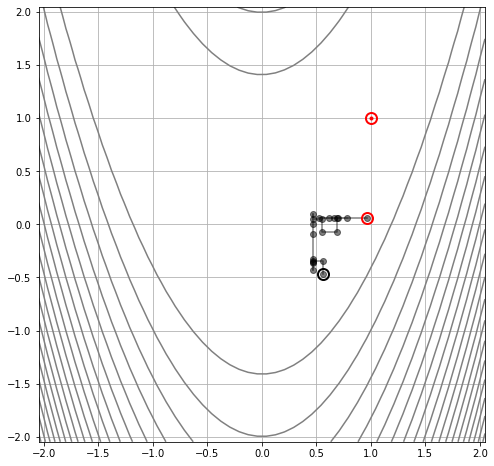

In [3]:
#
# Trayectoria del punto inicial al punto final
#
fn.plot_trayectory(monitor)

In [4]:
monitor.global_x_opt, monitor.global_fn_x_opt

(array([0.96388836, 0.05561188]), 1.8948546703375757)

## Mutación aleatoria independiente en cada uno de los ejes

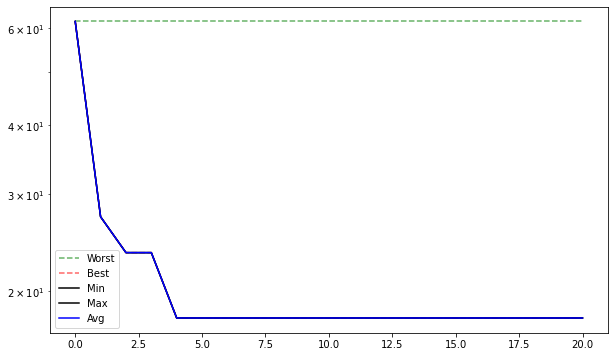

In [5]:
# semilla del generador aleatorio
rng = np.random.default_rng(12345)

monte_carlo = RandomUniform(
    pop_size=1,
    low=fn.LB,
    high=fn.UB,
    seed=123456,
)
evaluator = FnEvaluator(fn)
cloning = Cloning()
monitor = Monitor()
select_best = SelectionBest(k=1)

solutions = monte_carlo()
solutions = evaluator(solutions)
monitor(solutions)

NITER = 20

for iter in range(NITER):

    #
    #  Copia la solución actual
    #
    new_solutions = cloning(solutions) + cloning(solutions)

    #
    # Adiciona una mutación aleatoria el eje seleccionado.
    # Para la siguiente iteración se usa la mutación para
    # el eje que produce la mayor mejora
    #
    for i_dim in range(2):
        new_solutions[i_dim].x[i_dim] += 0.1 * rng.normal()
        new_solutions[i_dim].fn_x = None

    #
    # Evalua la solución actual
    #
    new_solutions = evaluator(new_solutions)

    #
    # Mantiene la mejor solución
    #
    solutions = select_best(solutions + new_solutions)

    monitor(solutions)

monitor.plot_stats()

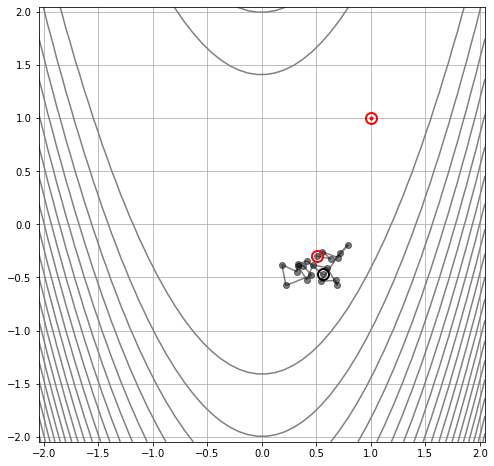

In [6]:
#
# Trayectoria del punto inicial al punto final
#
fn.plot_trayectory(monitor)

In [7]:
monitor.global_x_opt, monitor.global_fn_x_opt

(array([ 0.50783221, -0.29818337]), 17.880060782047487)

## Descenso acelerado

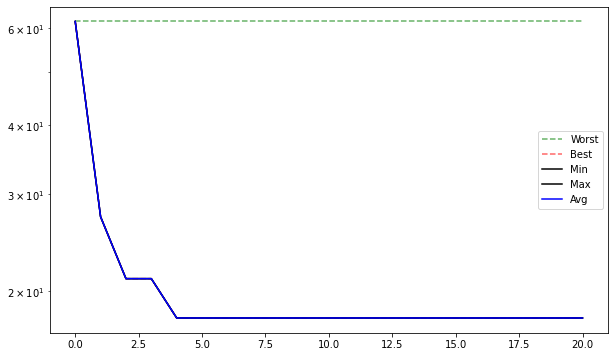

In [8]:
# semilla del generador aleatorio
rng = np.random.default_rng(12345)

monte_carlo = RandomUniform(
    pop_size=1,
    low=fn.LB,
    high=fn.UB,
    seed=123456,
)
evaluator = FnEvaluator(fn)
cloning = Cloning()
monitor = Monitor()
select_best = SelectionBest(k=1)

solutions = monte_carlo()
solutions = evaluator(solutions)
monitor(solutions)

NITER = 20

for iter in range(NITER):

    for i_dim in range(2):
        new_solutions = cloning(solutions)
        new_solutions[0].x[i_dim] += 0.1 * rng.normal()
        new_solutions[0].fn_x = None
        new_solutions = evaluator(new_solutions)
        solutions = select_best(solutions + new_solutions)

    monitor(solutions)

monitor.plot_stats()

## Experimento 1

100% (1140 of 1140) |####################| Elapsed Time: 0:00:34 Time:  0:00:34


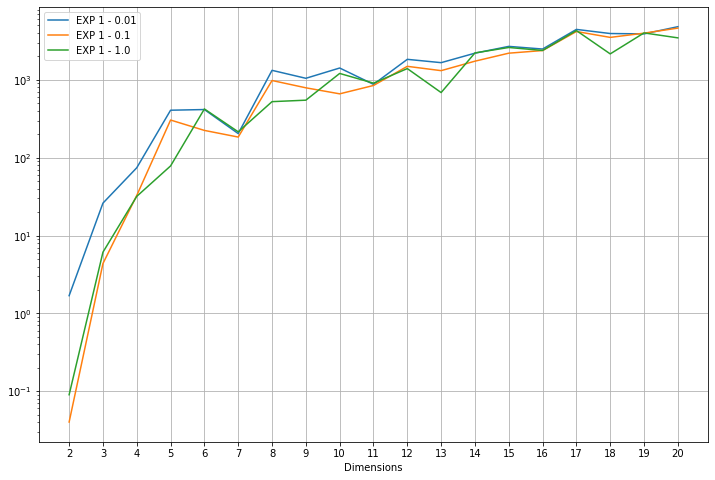

In [9]:
import progressbar

POPSIZE = 1
NDIMS = 20
SIGMAS = [0.01, 0.1, 1.0]
NITER = 100
NRUNS = 20


rng = np.random.default_rng(12345)

select = SelectionBest(k=POPSIZE)

best_fn_x = {}

max_value = len(SIGMAS) * (NDIMS - 1) * NRUNS

counter = 0
with progressbar.ProgressBar(max_value=max_value) as bar:

    for i_sigma, sigma in enumerate(SIGMAS):

        exp_name = "EXP 1 - " + str(sigma)
        best_fn_x[exp_name] = []

        for n_dim in range(2, NDIMS + 1):

            fn = Rosenbrock(n_dim=n_dim)
            evaluator = FnEvaluator(fn)
            monitor = Monitor()

            monte_carlo = RandomUniform(
                pop_size=POPSIZE,
                low=fn.LB,
                high=fn.UB,
                seed=123456,
            )

            for i_run in range(NRUNS):

                solutions = monte_carlo()
                solutions = evaluator(solutions)

                for iter in range(NITER):

                    i_dim = rng.integers(0, n_dim, 1)[0]

                    #
                    #  Copia la solución actual
                    #
                    new_solutions = cloning(solutions)

                    #
                    # Adiciona una mutación aleatoria el eje seleccionado y
                    # la evalua
                    #
                    new_solutions[0].x[i_dim] += sigma * rng.normal()
                    new_solutions[0].fn_x = None
                    new_solutions = evaluator(new_solutions)

                    #
                    # Mantiene la mejor solución
                    #
                    solutions = select_best(solutions + new_solutions)

                    monitor(solutions)

                counter += 1
                bar.update(counter)

            best_fn_x[exp_name].append(0.00000001 + monitor.global_fn_x_opt)


#
# Grafica los resultados
#
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))

for k in best_fn_x.keys():
    plt.plot(list(range(2, NDIMS + 1)), best_fn_x[k], label="{}".format(k))

plt.yscale("log")
plt.grid()
plt.xticks(np.arange(2, NDIMS + 1, 1))
plt.xlabel("Dimensions")
plt.legend()
plt.show()

## Experimento 2

100% (1140 of 1140) |####################| Elapsed Time: 0:00:32 Time:  0:00:32


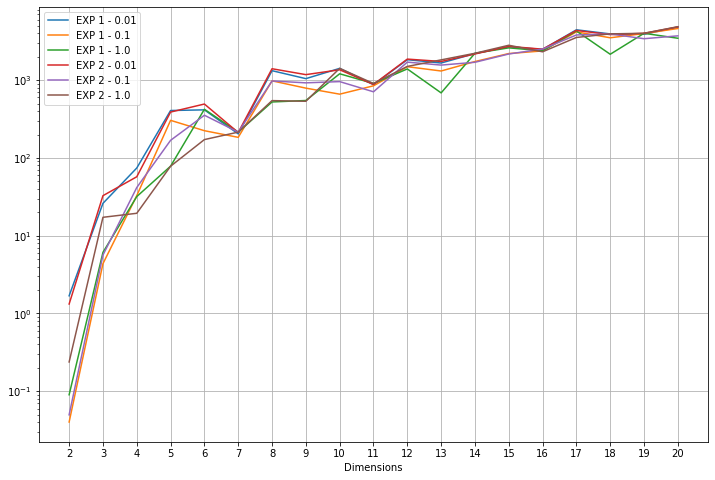

In [10]:
POPSIZE = 1
NDIMS = 20
SIGMAS = [0.01, 0.1, 1.0]
NITER = 100
NRUNS = 20

rng = np.random.default_rng(12345)

select = SelectionBest(k=POPSIZE)

max_value = len(SIGMAS) * (NDIMS - 1) * NRUNS

counter = 0
with progressbar.ProgressBar(max_value=max_value) as bar:

    for i_sigma, sigma in enumerate(SIGMAS):

        exp_name = "EXP 2 - " + str(sigma)
        best_fn_x[exp_name] = []

        for n_dim in range(2, NDIMS + 1):

            fn = Rosenbrock(n_dim=n_dim)
            evaluator = FnEvaluator(fn)
            monitor = Monitor()

            monte_carlo = RandomUniform(
                pop_size=POPSIZE,
                low=fn.LB,
                high=fn.UB,
                seed=123456,
            )

            for i_run in range(NRUNS):

                solutions = monte_carlo()
                solutions = evaluator(solutions)

                i_dim = 0

                for iter in range(NITER):

                    #
                    #  Copia la solución actual
                    #
                    new_solutions = cloning(solutions)

                    #
                    # Adiciona una mutación aleatoria el eje seleccionado y
                    # la evalua
                    #
                    new_solutions[0].x[i_dim] += sigma * rng.normal()
                    new_solutions[0].fn_x = None
                    new_solutions = evaluator(new_solutions)

                    #
                    # Mantiene la mejor solución
                    #
                    solutions = select_best(solutions + new_solutions)

                    monitor(solutions)

                    i_dim += 1
                    i_dim = 0 if i_dim >= n_dim else i_dim

                counter += 1
                bar.update(counter)

            best_fn_x[exp_name].append(0.00000001 + monitor.global_fn_x_opt)


#
# Grafica los resultados
#
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))

for k in best_fn_x.keys():
    plt.plot(list(range(2, NDIMS + 1)), best_fn_x[k], label="{}".format(k))

plt.yscale("log")
plt.grid()
plt.xticks(np.arange(2, NDIMS + 1, 1))
plt.xlabel("Dimensions")
plt.legend()
plt.show()

## Experimento 3

100% (300 of 300) |######################| Elapsed Time: 0:01:03 Time:  0:01:03


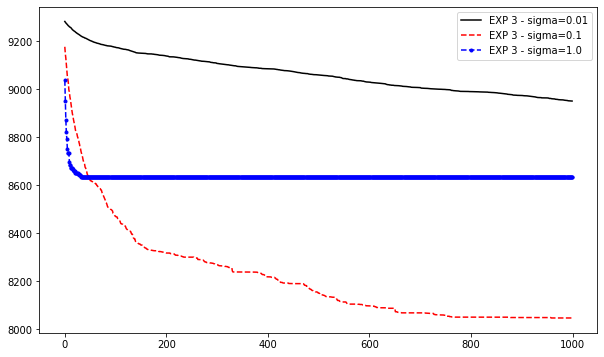

In [11]:
POPSIZE = 1
NDIMS = 20
SIGMAS = [0.01, 0.1, 1.0]
NITER = 1000
NRUNS = 100

rng = np.random.default_rng(12345)

select = SelectionBest(k=POPSIZE)

max_value = len(SIGMAS) * NRUNS

fn = Rosenbrock(n_dim=NDIMS)
evaluator = FnEvaluator(fn)

monte_carlo = RandomUniform(
    pop_size=POPSIZE,
    low=fn.LB,
    high=fn.UB,
    seed=123456,
)

monitors_1 = []

counter = 0
with progressbar.ProgressBar(max_value=max_value) as bar:

    for i_sigma, sigma in enumerate(SIGMAS):

        exp_name = "EXP 3 - " + str(sigma)
        best_fn_x[exp_name] = []

        monitor = Monitor()

        for i_run in range(NRUNS):

            monitor.new_run()

            solutions = monte_carlo()
            solutions = evaluator(solutions)

            for iter in range(NITER):

                i_dim = rng.integers(0, NDIMS, 1)[0]

                #
                #  Copia la solución actual
                #
                new_solutions = cloning(solutions)

                #
                # Adiciona una mutación aleatoria el eje seleccionado y
                # la evalua
                #
                new_solutions[0].x[i_dim] += sigma * rng.normal()
                new_solutions[0].fn_x = None
                new_solutions = evaluator(new_solutions)

                #
                # Mantiene la mejor solución
                #
                solutions = select_best(solutions + new_solutions)

                monitor(solutions)

            counter += 1
            bar.update(counter)

            best_fn_x[exp_name].append(0.00000001 + monitor.global_fn_x_opt)

        monitors_1.append(monitor)

#
#
#
from EAOS.monitor import plot_performance

legends_1 = ["EXP 3 - sigma={}".format(sigma) for sigma in SIGMAS]

plot_performance(monitors_1, legends=legends_1)

## Experimento 4

100% (300 of 300) |######################| Elapsed Time: 0:00:58 Time:  0:00:58


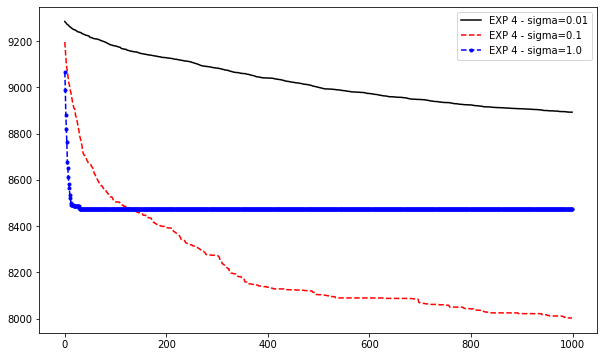

In [12]:
POPSIZE = 1
NDIMS = 20
SIGMAS = [0.01, 0.1, 1.0]
NITER = 1000
NRUNS = 100

rng = np.random.default_rng(12345)

select = SelectionBest(k=POPSIZE)

max_value = len(SIGMAS) * NRUNS

fn = Rosenbrock(n_dim=NDIMS)
evaluator = FnEvaluator(fn)

monte_carlo = RandomUniform(
    pop_size=POPSIZE,
    low=fn.LB,
    high=fn.UB,
    seed=123456,
)

monitors_2 = []

counter = 0
with progressbar.ProgressBar(max_value=max_value) as bar:

    for i_sigma, sigma in enumerate(SIGMAS):

        exp_name = "EXP 4 - " + str(sigma)
        best_fn_x[exp_name] = []

        monitor = Monitor()

        for i_run in range(NRUNS):

            monitor.new_run()

            solutions = monte_carlo()
            solutions = evaluator(solutions)

            i_dim = 0
            
            for iter in range(NITER):

                #
                #  Copia la solución actual
                #
                new_solutions = cloning(solutions)

                #
                # Adiciona una mutación aleatoria el eje seleccionado y
                # la evalua
                #
                new_solutions[0].x[i_dim] += sigma * rng.normal()
                new_solutions[0].fn_x = None
                new_solutions = evaluator(new_solutions)

                i_dim += 1
                i_dim = i_dim if i_dim < NDIMS else 0
                
                #
                # Mantiene la mejor solución
                #
                solutions = select_best(solutions + new_solutions)

                monitor(solutions)

            counter += 1
            bar.update(counter)

            best_fn_x[exp_name].append(0.00000001 + monitor.global_fn_x_opt)

        monitors_2.append(monitor)

#
#
#
legends_2 = ["EXP 4 - sigma={}".format(sigma) for sigma in SIGMAS]

plot_performance(monitors_2, legends=legends_2)

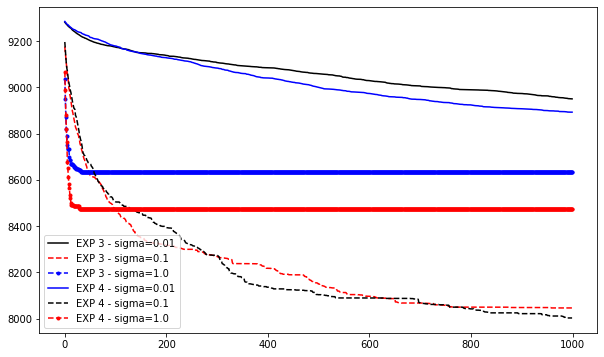

In [13]:
plot_performance(monitors_1 + monitors_2, legends=legends_1 + legends_2)